## Machine Learning
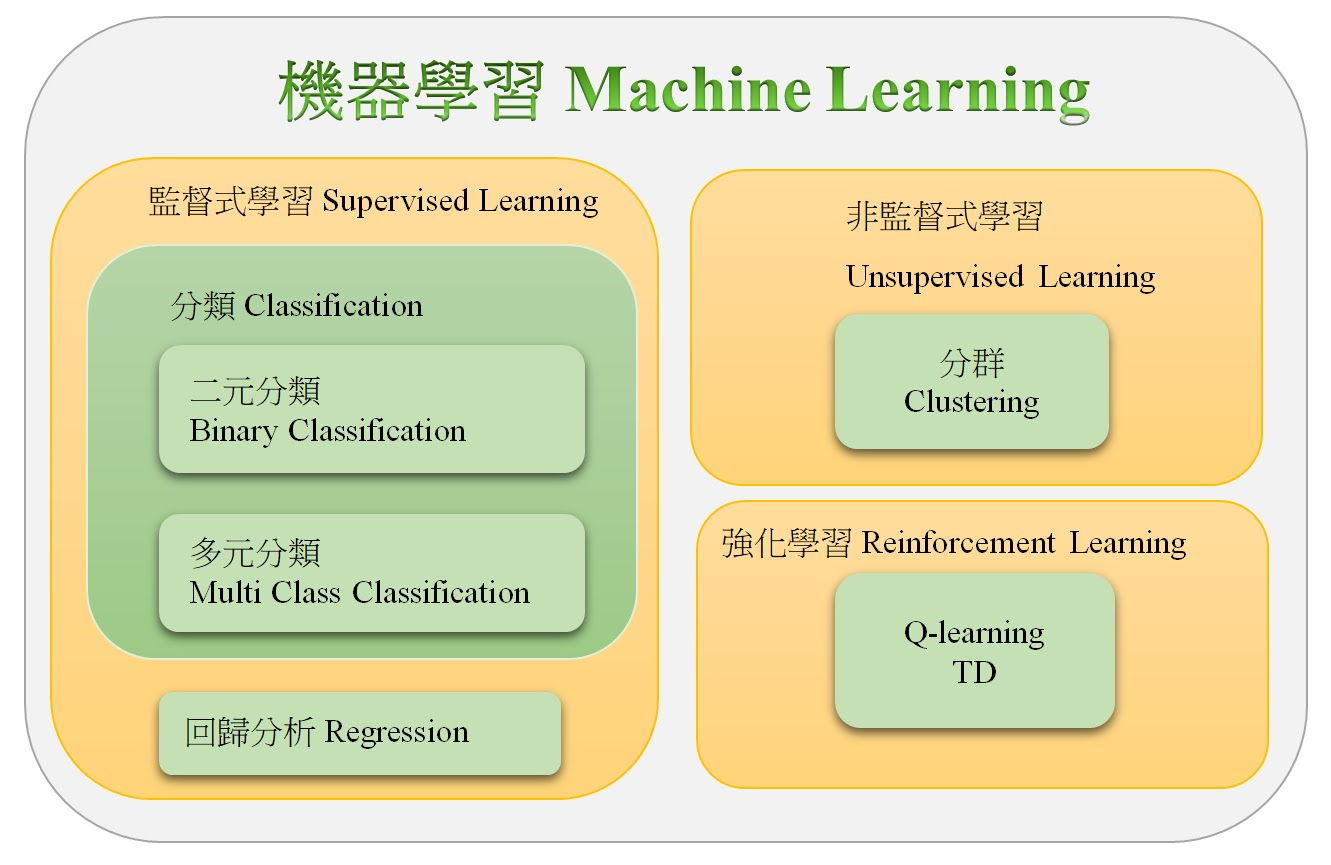

### Scikit-learn介紹
#### https://scikit-learn.org/stable/
![](https://i.imgur.com/XFLCGKd.png)

## Ensemble learning之Bagging、Boosting和AdaBoost
http://violin-tao.blogspot.com/2018/01/ml-ensemble.html
「三個臭皮匠勝過一個諸葛亮」
![](https://i.imgur.com/ft76Sye.png)
### Bagging

Bagging概念很簡單，從訓練資料中隨機抽取(取出後放回，n<N)樣本訓練多個分類器(要多少個分類器自己設定)，每個分類器的權重一致最後用投票方式(Majority vote)得到最終結果，而這種抽樣的方法在統計上稱為!bootstrap

![](https://i.imgur.com/oMe5VtS.png)

Note: Bagging的精神在於從樣本中抽樣這件事情，如果模型不是分類問題而是預測的問題，分類器部份也可以改成regression，最後投票方式改成算平均數即可。如果是用Bagging會希望單一分類器能夠是一個效能比較好的分類器。

Bagging的優點在於原始訓練樣本中有噪聲資料(不好的資料)，透過Bagging抽樣就有機會不讓有噪聲資料被訓練到，所以可以降低模型的不穩定性。

### Boosting(每次找的人都要能夠做到上一個人沒辦法辦到的事情！)
Boosting算法是將很多個弱的分類器(weak classifier)進行合成變成一個強分類器(Strong classifier)，和Bagging不同的是分類器之間是有關聯性的，是透過將舊分類器的錯誤資料權重提高，然後再訓練新的分類器，這樣新的分類器就會學習到錯誤分類資料(misclassified data)的特性，進而提升分類結果。
Boosting的概念很玄，我自己的解讀是舊的分類器在訓練有些資料落在confusion area，如果再用全部的data下去訓練，錯的資料永遠都會判錯，因此我們需要針對錯誤的資料去學習(將錯誤的資料權重加大)，那這樣新訓練出來的分類器才能針對這些錯誤判讀的資料得到好的結果。
![](https://i.imgur.com/ndpY17P.png)

Note: 由於Boosting將注意力集中在分類錯誤的資料上，因此Boosting對訓練資料的噪聲非常敏感，如果一筆訓練資料噪聲資料很多，那後面分類器都會集中在進行噪聲資料上分類，反而會影響最終的分類性能。
對於Boosting來說，有兩個關鍵，一是在如何改變訓練資料的權重；二是如何將多個弱分類器組合成一個強分類器。而且存在一個重大的缺陷：該分類算法要求預先知道弱分類器識別準確率的下限。
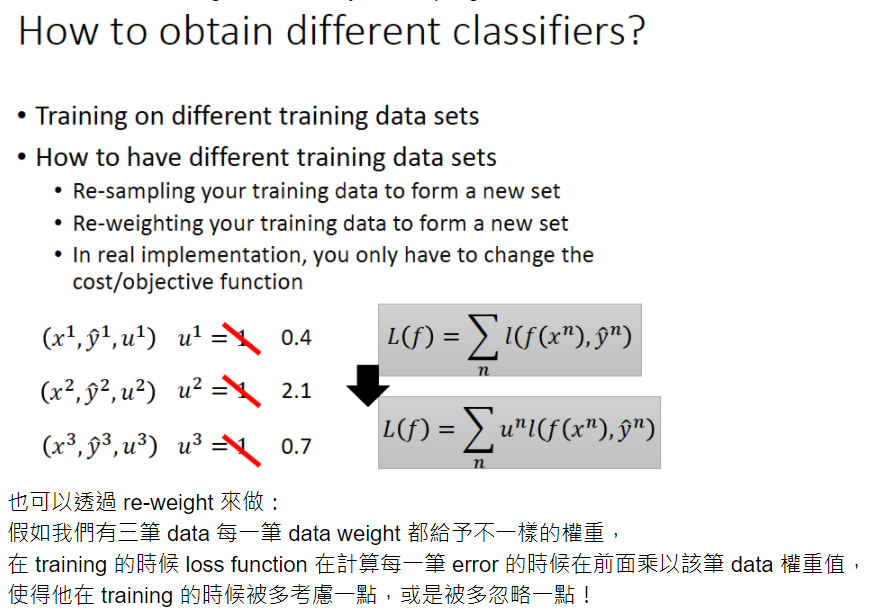


### Bagging與Boosting的區別之處：
訓練樣本:
Bagging: 每一次的訓練集是隨機抽取(每個樣本權重一致)，抽出可放回，以獨立同分布選取的訓練樣本子集訓練弱分類器。
Boosting: 每一次的訓練集不變，訓練集之間的選擇不是獨立的，每一是選擇的訓練集都是依賴上一次學習得結果，根據錯誤率(給予訓練樣本不同的權重)取樣。
分類器:
Bagging: 每個分類器的權重相等。
Boosting: 每個弱分類器都有相應的權重，對於分類誤差小的分類器會有更大的權重。
每個分類器的取得:
Bagging: 每個分類器可以並行生成。
Boosting: 每個弱分類器只能依賴上一次的分類器順序生成。
Bagging和Boosting這兩種方法是比較常見的ensemble learning的方法，當然ensemble learning還有很多不同的方法，比如
1. 將不同的分類器進行合成提高單一分類器的效果例如SVM+k-NN+MLP+QDA+BNC等。
2. 很多個SVM合成，方式為每個SVM給不同的kernel function或是kernel參數。
3. Random subspace: 這個概念跟bagging很像，不同的是bagging是從訓練樣本去抽樣產生不同的訓練集來訓練分類器，但Random subspace是feature bagging，從特徵中去抽樣，然後訓練多個分類器做合成，通常用在非常高維度的資料中。當然也有衍生出來的feature Adaboosting。
但不論用哪種方式都是把多個分類器整合出一個結果，只是整合的方式不一樣，最終得到不一樣的效果。
Note: 因為Decision tree最近比較紅，所以提一下
1. Random Forest : Bagging + Decision tree
2. Boosting Tree : AdaBoost + Decision tree
3. GBDT : Gradient Boost + Decision tree

### XGBoost
XGBoost (eXtreme Gradient Boosting ) 是基於 Gradient Boosted Decision Tree (GBDT) 改良與延伸，被應用於解決監督式學習的問題。



- based on boosting
- based on CART Tree
- 支援平行運算
- 剪枝
- 支援分類與回歸
- 目標函數
- 增量訓練 ( additive training) 


### 做法
#### 1. Tree Boosting
- Ensemble tree
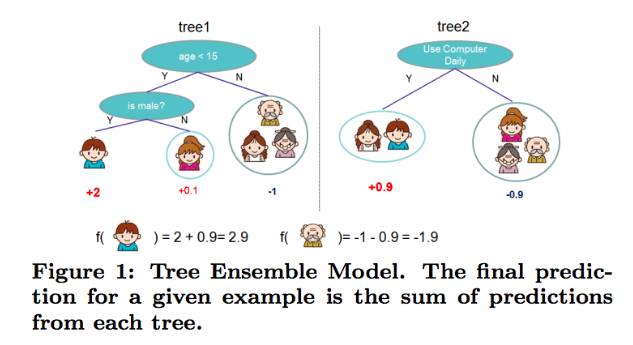
- 上面的例子是一個預測一個人是否會喜歡電腦遊戲的 CART，你可以把葉子的分數理解為有多可能這個人喜歡電腦遊戲。


##### CART 分類
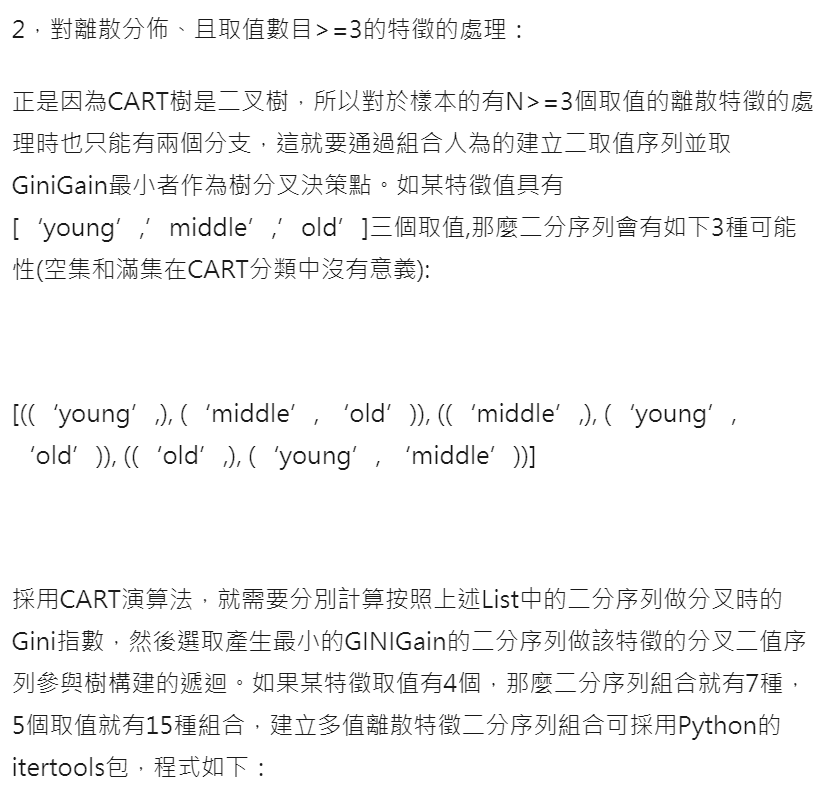

#### 2.目標函數
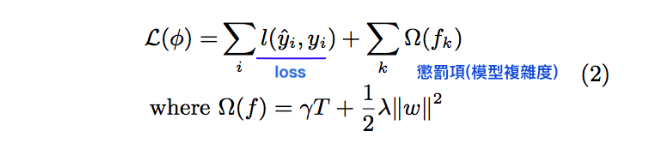
- 損失函數能夠說明我們跟資料的擬合程度，而右邊的正則項可以說是懲罰函數，用來懲罰太過複雜的模型
- 懲罰項是衡量模型的複雜度(懲罰複雜的模型)；GBDT 無此懲罰項的設計，故當懲罰項為 0 的時候，即為一般的 GBDT。
- 而在正則(懲罰項)項裡面呢常見的是L1與L2正則化，這個在參數裡面都可以調整，正則化主要就是用來限制模型避免過擬合，使得模型不要過擬合。正則項裏包含了樹的葉子節點個數、每個葉子節點上輸出的score的L2模的平方和。從Bias-variance tradeoff角度來講，正則項降低了模型的variance，使學習出來的模型更加簡單，防止過擬合，這也是xgboost優於傳統GBDT的一個特性。

#### 3.增量訓練 ( additive training)
每一次保留原來的模型不變，並且加入一個新的函數至模型中，也就是說每一步我們皆會在前一步的基礎上增加一顆樹，以修復上一顆樹的不足，有助於提升目標函數。
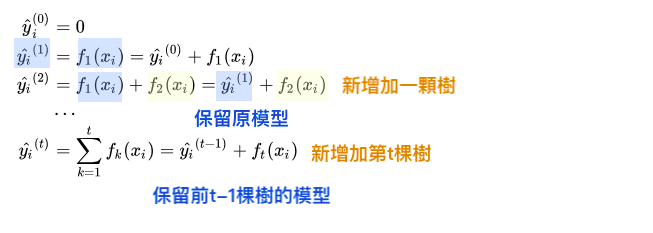

#### 4.缺失值處理：
對缺失值的處理。對於特征的值有缺失的樣本，XGBoost內置處理缺失值的規則，可以自動學習出它的分裂方向。

#### 5. 平行system design
xgboost工具支持並行。boosting不是一種串行的結構嗎?怎麽並行的？註意xgboost的並行不是tree粒度的並行，xgboost也是一次叠代完才能進行下一次叠代的（第t次叠代的代價函數裏包含了前面t-1次叠代的預測值）。xgboost的並行是在特征粒度上的。
我們知道，決策樹的學習最耗時的一個步驟就是對特征的值進行排序（因為要確定最佳分割點），xgboost在訓練之前，預先對數據進行了排序，然後保存為block結構，後面的叠代中重覆地使用這個結構，大大減小計算量。這個block結構也使得並行成為了可能，在進行節點的分裂時，需要計算每個特征的增益，最終選增益最大的那個特征去做分裂，那麽各個特征的增益計算就可以開多線程進行。
可並行的近似直方圖算法。樹節點在進行分裂時，我們需要計算每個特征的每個分割點對應的增益，即用貪心法枚舉所有可能的分割點。當數據無法一次載入內存或者在分布式情況下，貪心算法效率就會變得很低，所以xgboost還提出了一種可並行的近似直方圖算法，用於高效地生成候選的分割點

#### 6. Shrinkage
相當於學習速率（xgboost中的eta）。xgboost在進行完一次叠代後，會將葉子節點的權重乘上該系數，主要是為了削弱每棵樹的影響，讓後面有更大的學習空間。實際應用中，一般把eta設置得小一點，然後叠代次數設置得大一點。

#### 7.剪枝
當分裂時遇到一個負損失時，GBM會停止分裂。因此GBM實際上是一個貪心算法。XGBoost會一直分裂到指定的最大深度(max_depth)，然後回過頭來剪枝。如果某個節點之後不再有正值，它會去除這個分裂。 這種做法的優點，當一個負損失（如-2）後面有個正損失（如+10）的時候，就顯現出來了。GBM會在-2處停下來，因為它遇到了一個負值。但是XGBoost會繼續分裂，然後發現這兩個分裂綜合起來會得到+8，因此會保留這兩個分裂。

### Code

In [2]:
import sklearn
import xgboost as xgb
import pandas as pd
import numpy as np
from scipy import stats
import os
import csv
from statistics import mean, median
from pprint import pprint


### 讀csv資料

In [52]:
df = pd.read_csv("dataset_count16.csv", error_bad_lines=False)

In [53]:
len(df[df.Status2==0]),len(df[df.Status2==1]),len(df[df.Status2==2])

(114, 162, 217)

### 將dataset分成train跟test

In [55]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, random_state=777, train_size=0.75)

In [56]:
file = test_data['File']

In [57]:
train_data_Y = train_data['Status2']
test_data_Y = test_data['Status2']

train_data = train_data.drop("Status2",1)
train_data = train_data.drop("File",1)
train_data = train_data.drop("STC Power",1)
train_data = train_data.drop("Status",1)
train_data = train_data.drop("Soiling Weight",1)

test_data = test_data.drop("Status2",1)
test_data = test_data.drop("File",1)
test_data = test_data.drop("STC Power",1)
test_data = test_data.drop("Status",1)
test_data = test_data.drop("Soiling Weight",1)

In [58]:
train_data

,SD,SR,count1,count2,count3,count4,count5,count6,count7,count8,count9,count10,count11,count12,count13,count14,count15,count16
129,130.499387,0.106130,0.000000,0.025124,0.027239,0.001156,0.000396,0.223443,0.143018,0.005729,0.021156,0.186902,0.193736,0.032051,0.003062,0.044134,0.066478,0.026374
136,119.513197,0.103454,0.000000,0.042752,0.058576,0.002402,0.000000,0.235236,0.190991,0.007482,0.001972,0.177378,0.215635,0.038616,0.000000,0.003574,0.017677,0.007709
386,136.795846,0.078139,0.004104,0.008402,0.007134,0.000000,0.133829,0.376045,0.072330,0.000344,0.037261,0.032361,0.096934,0.012528,0.084320,0.038679,0.065045,0.030685
491,148.484838,0.093224,0.000000,0.041894,0.023562,0.002971,0.011459,0.139303,0.162509,0.015498,0.022727,0.133102,0.109759,0.049246,0.040634,0.057775,0.111703,0.077859
250,240.084810,0.000967,0.000000,0.054883,0.442468,0.000000,0.000000,0.043149,0.009841,0.000000,0.050719,0.040500,0.032930,0.000000,0.268357,0.007949,0.000000,0.049205
453,131.705191,0.196081,0.000000,0.024518,0.040647,0.002041,0.015683,0.183540,0.176299,0.008125,0.045749,0.203516,0.170684,0.007596,0.026914,0.042718,0.047102,0.004867
460,201.432798,0.075261,0.001066,0.023977,0.022379,0.000000,0.013044,0.003900,0.013896,0.010081,0.055372,0.005605,0.000661,0.059187,0.182016,0.248300,0.294763,0.065752
359,174.797133,0.175190,0.007122,0.008818,0.007472,0.000000,0.023497,0.002215,0.001430,0.000056,0.029960,0.051438,0.066439,0.043026,0.161042,0.275596,0.231897,0.089991
226,255.049573,0.002521,0.000000,0.101629,0.223746,0.109211,0.000968,0.034683,0.030005,0.000000,0.040006,0.015809,0.041620,0.004194,0.203581,0.008872,0.045975,0.139700
135,124.376555,0.105800,0.000000,0.043446,0.096637,0.008083,0.000000,0.208621,0.211702,0.023258,0.000452,0.152152,0.193018,0.036366,0.000000,0.002433,0.016288,0.007545


In [9]:
train_data_Y

129    1
136    1
386    2
491    1
250    0
453    2
460    2
359    2
226    0
135    1
430    2
51     0
334    2
362    2
7      0
133    1
381    2
243    0
55     0
110    1
98     1
454    2
204    1
145    1
242    0
18     0
377    2
57     0
255    0
107    1
      ..
74     1
492    1
187    1
31     0
65     1
263    1
325    2
340    2
338    2
321    2
347    2
32     0
142    1
397    2
402    2
295    2
280    2
302    2
473    2
423    2
116    1
127    1
157    2
71     1
433    2
87     1
422    2
59     0
303    2
103    1
Name: Status2, Length: 369, dtype: int64

In [10]:
len(train_data),len(test_data)

(369, 124)

### 參數

### booster
- gbtree 樹模型做為基分類器（默認）
- gbliner 線性模型做為基分類器
#### silent
- silent=0時，不輸出中間過程（默認）
- silent=1時，輸出中間過程
#### nthread
- nthread=-1時，使用全部CPU進行並行運算（默認）
- nthread=1時，使用1個CPU進行運算。
#### scale_pos_weight
- 正樣本的權重，在二分類任務中，當正負樣本比例失衡時，設置正樣本的權重，模型效果更好。例如，當正負樣本比例為1:10時，scale_pos_weight=10。

### 模型參數
#### n_estimatores
    含義：總共叠代的次數，即決策樹的個數
    調參：
#### early_stopping_rounds
    含義：在驗證集上，當連續n次叠代，分數沒有提高後，提前終止訓練。
    調參：防止overfitting。
#### max_depth
    含義：樹的深度，默認值為6，典型值3-10。
    調參：值越大，越容易過擬合；值越小，越容易欠擬合。
#### min_child_weight
    含義：默認值為1,。
    調參：值越大，越容易欠擬合；值越小，越容易過擬合（值較大時，避免模型學習到局部的特殊樣本）。
#### subsample
    含義：訓練每棵樹時，使用的數據占全部訓練集的比例。默認值為1，典型值為0.5-1。
    調參：防止overfitting。
#### colsample_bytree
    含義：訓練每棵樹時，使用的特征占全部特征的比例。默認值為1，典型值為0.5-1。
    調參：防止overfitting。

#### learning_rate
    含義：學習率，控制每次叠代更新權重時的步長，默認0.3。
    調參：值越小，訓練越慢。
    典型值為0.01-0.2。
#### objective 目標函數
    回歸任務
        reg:linear (默認)
        reg:logistic 
    二分類
        binary:logistic     概率 
        binary：logitraw   類別
    多分類
        multi：softmax  num_class=n   返回類別
        multi：softprob   num_class=n  返回概率
    rank:pairwise 
#### eval_metric
    回歸任務(默認rmse)
        rmse--均方根誤差
        mae--平均絕對誤差
    分類任務(默認error)
        auc--roc曲線下面積
        error--錯誤率（二分類）
        merror--錯誤率（多分類）
        logloss--負對數似然函數（二分類）
        mlogloss--負對數似然函數（多分類）

#### gamma
    懲罰項系數，指定節點分裂所需的最小損失函數下降值。
    調參：
#### alpha
    L1正則化系數，默認為1
#### lambda
    L2正則化系數，默認為1

In [45]:
#樹的個數
n_estimators=100

# 如同學習率 新權值 = 當前權值 - 學習率 × 梯度
learning_rate= 0.2#, 0.01-0.2

# 構建樹的深度，越大越容易過擬合 3-5   
max_depth=7


In [27]:
gbm = xgb.XGBClassifier(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate).fit(train_data, train_data_Y)

/home/netlab2/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:51:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [28]:
test_y_predicted = gbm.predict(test_data)

In [29]:
from sklearn import  metrics
accuracy = metrics.accuracy_score(test_data_Y,test_y_predicted)
print(accuracy)

0.9919354838709677


In [19]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_data_Y,test_y_predicted))
a,b,c = confusion_matrix(test_data_Y,test_y_predicted)

[[36  0  0]
 [ 1 40  0]
 [ 0  0 47]]


### 儲存XGBoost model


In [20]:
import pickle #pickle模組

#儲存Model(注:save資料夾要預先建立，否則會報錯)
with open('model/xgboost_7_100_0.1_0.9758_counts9.pickle', 'wb') as f:
    #pickle.dump(gbm, f)

SyntaxError: unexpected EOF while parsing (<ipython-input-20-414297b292b4>, line 5)

### 載入model

In [48]:
from sklearn.externals import joblib
xgb_saved = joblib.load('model/xgboost_7_100_0.1_0.9919_counts16.pickle')

In [50]:
test_y_predicted2 = xgb_saved.predict(test_data)

In [51]:
from sklearn import  metrics
accuracy = metrics.accuracy_score(test_data_Y,test_y_predicted2)
print(accuracy)

0.9919354838709677


In [30]:
from graphviz import Digraph
from xgboost import plot_tree
import matplotlib.pyplot as plt


In [31]:
gbm

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.2, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=16, num_parallel_tree=1,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, subsample=1,
       tree_method='exact', use_label_encoder=True, validate_parameters=1,
       verbosity=None)

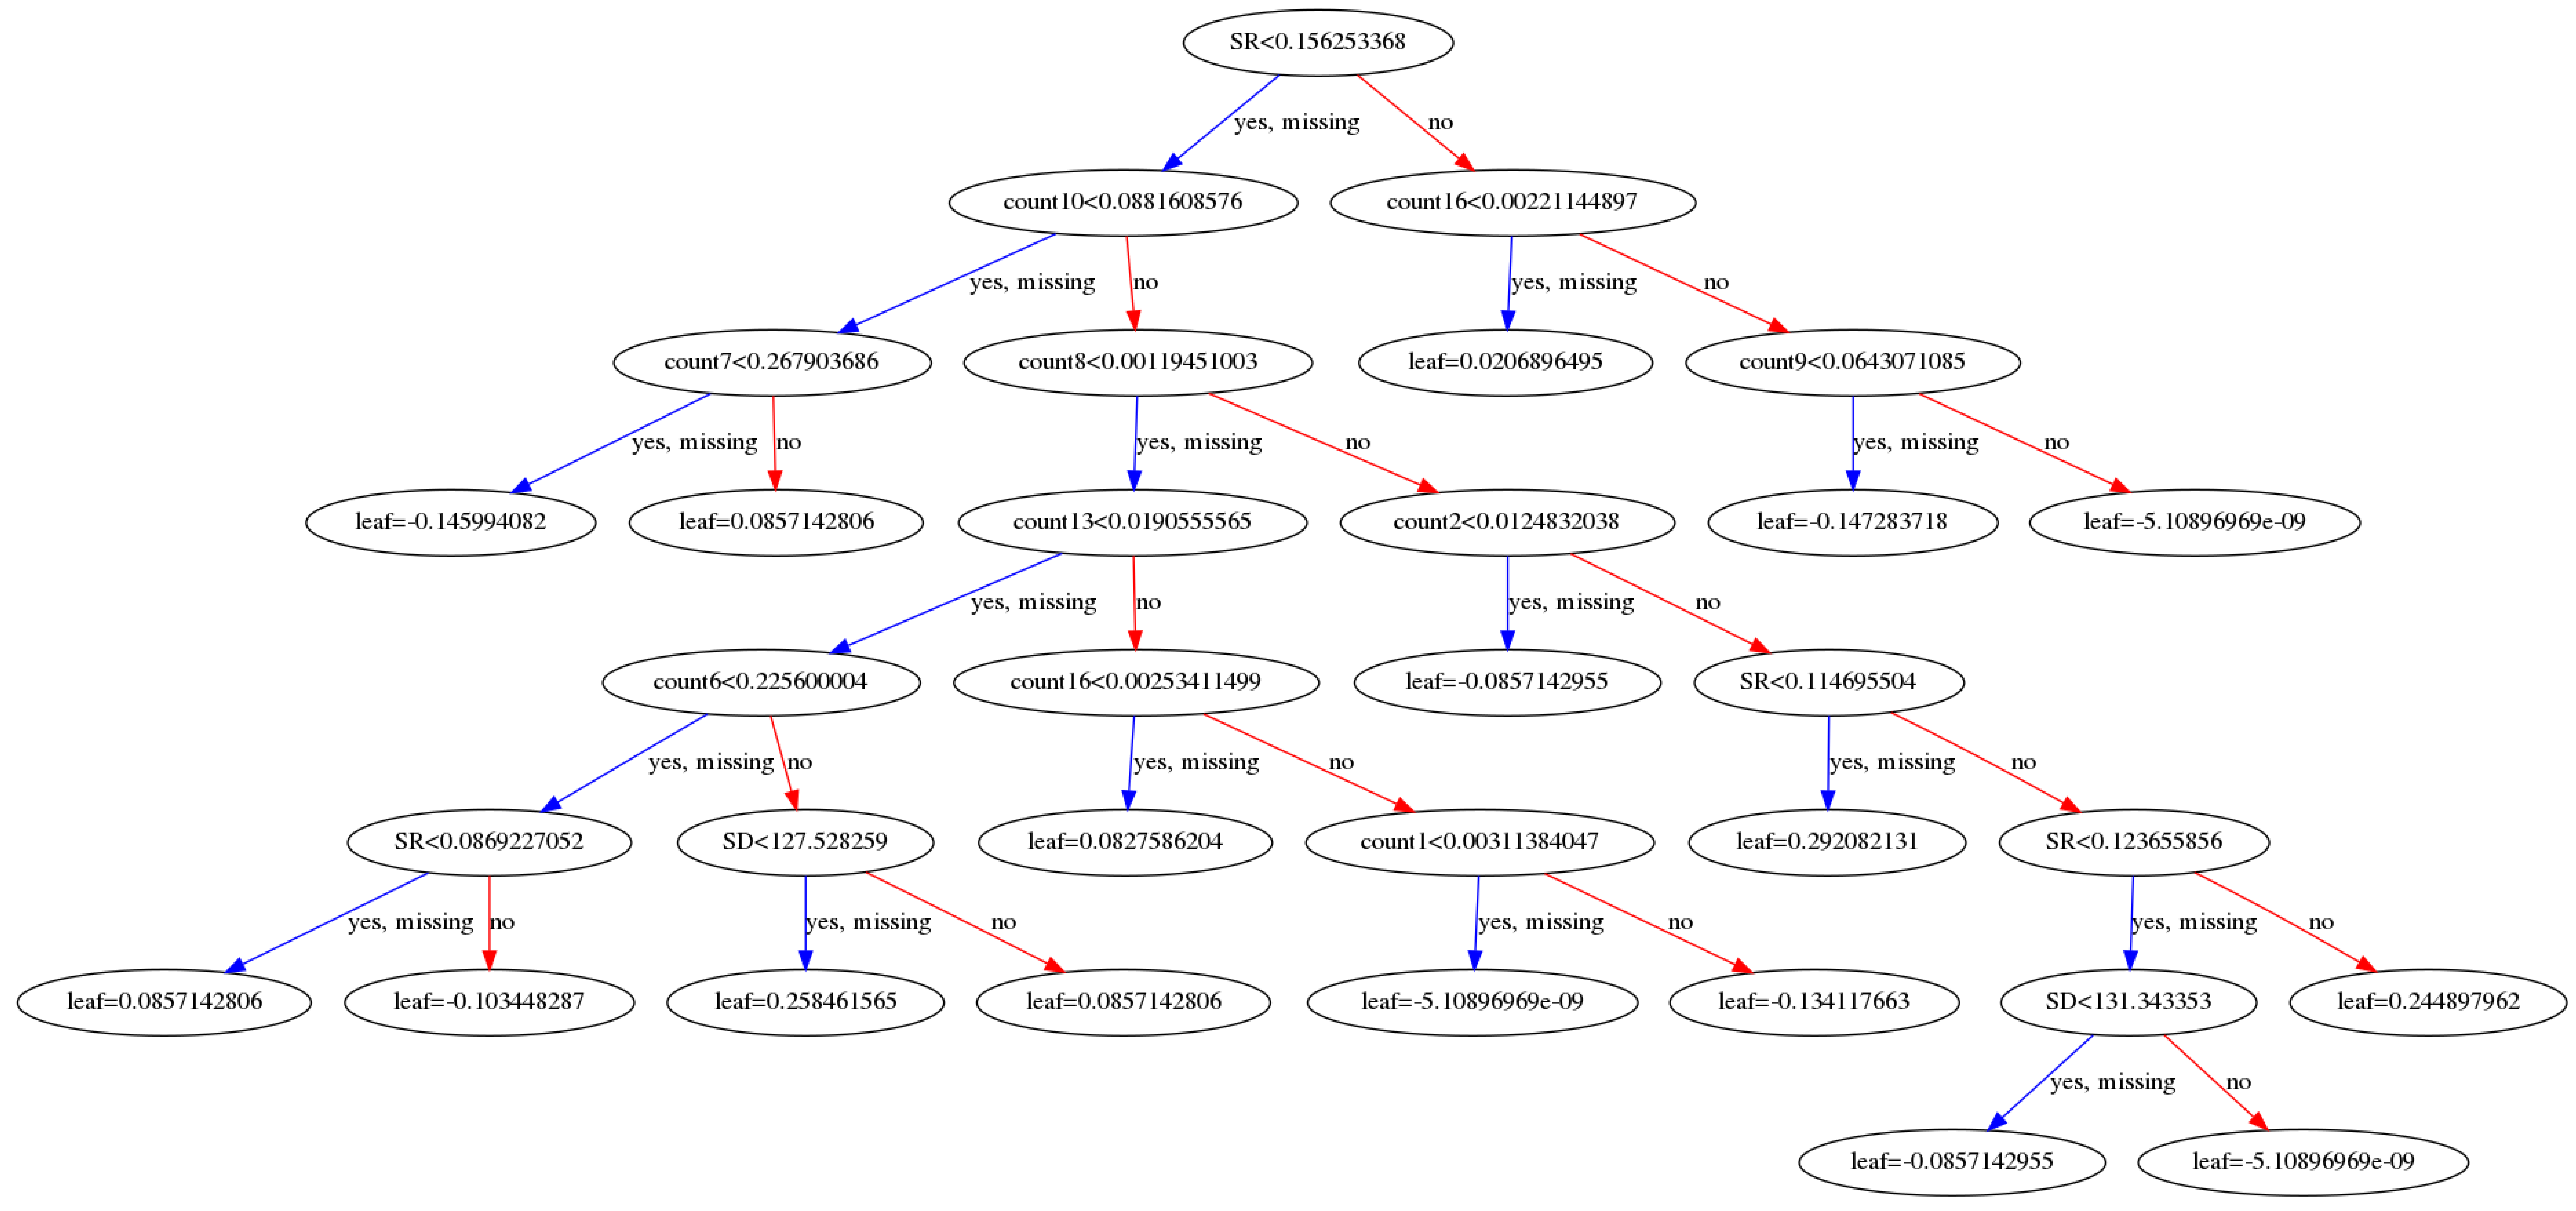

In [46]:
# 創建呈現在每一棵樹上的feature name
def create_feature_map(features):
    outfile = open("gbm.fmap", "w")
    i = 0
    for feat in features:
        outfile.write("{0}\t{1}\tq\t".format(i, feat))
        i = i+1
    outfile.close

create_feature_map(train_data.columns)
plot_tree(gbm, # 引入上面訓練好的xgb model 
          num_trees=1, # 第幾棵樹
          fmap="gbm.fmap") # 引入feature name

fig = plt.gcf()
fig.set_size_inches(150, 100)
plt.show()

### Features Selection

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=18)
fit = bestfeatures.fit(train_data,train_data_Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train_data.columns)


#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(18,'Score'))  #print 10 best features

      Specs        Score
0        SD  2846.584872
14  count13    27.443073
1        SR    24.215032
4    count3    12.274054
5    count4     8.812773
15  count14     8.573878
17  count16     8.432551
12  count11     7.815927
16  count15     6.444942
7    count6     5.753215
11  count10     5.469076
8    count7     5.419960
9    count8     5.107319
3    count2     1.725122
2    count1     1.429900
6    count5     1.232237
10   count9     0.784344
13  count12     0.179959


In [44]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(train_data,train_data_Y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=train_data.columns)
feat_importances

/home/netlab2/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/netlab2/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:487: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
/home/netlab2/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated al

SD         0.074862
SR         0.314889
count1     0.018260
count2     0.038283
count3     0.060650
count4     0.015880
count5     0.035582
count6     0.058258
count7     0.033392
count8     0.028516
count9     0.022969
count10    0.047607
count11    0.069175
count12    0.007737
count13    0.047182
count14    0.068828
count15    0.037950
count16    0.019980
dtype: float64